In [3]:
import pandas as pd
import numpy as np

In [4]:
file_path = '重庆-沙坪坝.xlsx'  
xls = pd.ExcelFile(file_path)

# 获取所有工作簿的名称
sheet_names = xls.sheet_names

# 读取两个工作簿
df_house= pd.read_excel(xls, sheet_name=sheet_names[0])
df_rent = pd.read_excel(xls, sheet_name=sheet_names[1])

df_house


,总价(万),面积,单价,location
0,59.0,121.91,4840,陈家桥
1,38.0,69.88,5438,陈家桥
2,50.0,121.33,4121,陈家桥
3,65.0,98.00,6633,陈家桥
4,80.0,126.64,6317,陈家桥
...,...,...,...,...
4133,26.7,45.95,5810,三峡大桥
4134,106.0,118.25,8965,三峡大桥
4135,47.0,45.13,10415,三峡大桥
4136,125.0,71.11,17579,三峡大桥


In [5]:
df_rent

,总价(元),面积,单价,location
0,1300,30,43.000000,陈家桥
1,1350,106,13.000000,陈家桥
2,1200,99,12.000000,陈家桥
3,1700,65,26.000000,陈家桥
4,1300,102,13.000000,陈家桥
...,...,...,...,...
2842,1200,57,21.052632,三峡大桥
2843,1400,37,37.837838,三峡大桥
2844,3500,100,35.000000,三峡大桥
2845,1600,68,23.529412,三峡大桥


In [75]:
numeric_cols = ['总价(万)', '面积', '单价']

#IQR法检测一场子
def detect_outliers_iqr(series, k=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    outliers = df_house[(series < lower_bound) | (series > upper_bound)]
    
    return outliers

locations = df_house['location'].unique()
results_by_location = {}

all_outliers = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_house[col])
    all_outliers[col] = outliers
    print(f"列 '{col}': 发现 {len(outliers)} 个异常值。")

# 分组分析
for loc in locations:
    print(f"{loc} ")
    
    # 筛选当前 location 的数据
    block_data = df_house[df_house['location'] == loc].copy() 

    # 描述性统计
    desc = block_data[numeric_cols].describe()
    print('\n[描述性统计]:')
    print(desc.T)
    
    # 区域内异常值检测
    outliers_data = {}
    for col in numeric_cols:
        # 针对当前区域的数据进行异常值检测
        Q1 = block_data[col].quantile(0.25)
        Q3 = block_data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        loc_outliers = block_data[(block_data[col] < lower_bound) | (block_data[col] > upper_bound)]
        
        print(f"  - '{col}' 异常值数量: {len(loc_outliers)}")
        
        outliers_data[col] = loc_outliers
        
    # 存储结果
    results_by_location[loc] = {
        'description': desc,
        'outliers': outliers_data
    }
    

列 '总价(万)': 发现 205 个异常值。
列 '面积': 发现 104 个异常值。
列 '单价': 发现 105 个异常值。
陈家桥 

[描述性统计]:
       count         mean          std      min      25%      50%       75%  \
总价(万)  257.0    98.845914    71.381320    20.00    49.90    66.00    161.00   
面积     257.0   108.662568    38.246692    30.88    87.74   103.88    128.52   
单价     257.0  8469.684825  3959.199135  3528.00  5842.00  6796.00  10697.00   

           max  
总价(万)    381.0  
面积       227.0  
单价     24767.0  
  - '总价(万)' 异常值数量: 1
  - '面积' 异常值数量: 4
  - '单价' 异常值数量: 4
磁器口 

[描述性统计]:
        count          mean          std     min      25%      50%       75%  \
总价(万)  1481.0    129.960756    80.336393    21.0    72.00    112.0    169.00   
面积     1481.0     98.226853    41.059505    32.0    73.03     94.0    120.13   
单价     1481.0  12731.097232  4736.328689  3903.0  9640.00  11861.0  14769.00   

            max  
总价(万)    680.00  
面积       287.67  
单价     37038.00  
  - '总价(万)' 异常值数量: 43
  - '面积' 异常值数量: 33
  - '单价' 异常值数量: 71
大学城 

[描述

In [76]:
#同上方卖房数据相同处理
numeric_cols = ['总价(元)', '面积', '单价']

def detect_outliers_iqr(series, k=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    outliers = df_rent[(series < lower_bound) | (series > upper_bound)]
    
    return outliers

locations = df_rent['location'].unique()
results_by_location = {}

all_outliers = {}
for col in numeric_cols:
    outliers = detect_outliers_iqr(df_rent[col])
    all_outliers[col] = outliers
    print(f"列 '{col}': 发现 {len(outliers)} 个异常值。")

# 分组分析
for loc in locations:
    print(f"{loc} ")
    
    # 筛选当前 location 的数据
    block_data = df_rent[df_rent['location'] == loc].copy() 

    # 描述性统计
    desc = block_data[numeric_cols].describe()
    print('\n[描述性统计]:')
    print(desc.T)
    
    # 区域内异常值检测
    outliers_data = {}
    for col in numeric_cols:
        # 针对当前区域的数据进行异常值检测
        Q1 = block_data[col].quantile(0.25)
        Q3 = block_data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        loc_outliers = block_data[(block_data[col] < lower_bound) | (block_data[col] > upper_bound)]
        
        print(f"  - '{col}' 异常值数量: {len(loc_outliers)}")
        
        outliers_data[col] = loc_outliers
        
    # 存储结果
    results_by_location[loc] = {
        'description': desc,
        'outliers': outliers_data
    }
    


列 '总价(元)': 发现 213 个异常值。
列 '面积': 发现 69 个异常值。
列 '单价': 发现 42 个异常值。
陈家桥 

[描述性统计]:
       count         mean         std    min      25%     50%      75%     max
总价(元)   48.0  1557.291667  480.689839  800.0  1200.00  1500.0  1800.00  3000.0
面积      48.0    89.416667   34.439483   30.0    67.25    90.5   102.25   231.0
单价      48.0    19.020833    7.009081    3.0    14.00    18.0    22.00    43.0
  - '总价(元)' 异常值数量: 1
  - '面积' 异常值数量: 2
  - '单价' 异常值数量: 1
磁器口 

[描述性统计]:
       count         mean          std         min          25%     50%  \
总价(元)  399.0  1758.190476  1073.448498  600.000000  1200.000000  1600.0   
面积     399.0    77.852130    42.073347   32.000000    43.000000    75.0   
单价     399.0    24.601090    10.270825    5.405405    19.298246    24.0   

               75%      max  
总价(元)  2100.000000  12000.0  
面积       95.500000    300.0  
单价       29.570747    137.5  
  - '总价(元)' 异常值数量: 16
  - '面积' 异常值数量: 11
  - '单价' 异常值数量: 7
大学城 

[描述性统计]:
        count         mean          st

In [77]:
sale_median = df_house.groupby('location')['总价(万)'].median().reset_index()
sale_median = sale_median.rename(columns={'总价(万)': '售价中位数(万)'})
sale_median

,location,售价中位数(万)
0,三峡大桥,84.0
1,大学城,87.0
2,磁器口,112.0
3,陈家桥,66.0


In [78]:
rent_median = df_rent.groupby('location')['总价(元)'].median().reset_index()
rent_median = rent_median.rename(columns={'总价(元)': '租价中位数(元)'})
rent_median

,location,租价中位数(元)
0,三峡大桥,1500.0
1,大学城,1500.0
2,磁器口,1600.0
3,陈家桥,1500.0


In [79]:
ratio_df = pd.merge(sale_median, rent_median, on='location', how='inner')

ratio_df['Price_to_Rent_Ratio'] = \
    ratio_df['售价中位数(万)']*10000 / (ratio_df['租价中位数(元)'] * 12)#月租金需乘12算出年租金

ratio_df

,location,售价中位数(万),租价中位数(元),Price_to_Rent_Ratio
0,三峡大桥,84.0,1500.0,46.666667
1,大学城,87.0,1500.0,48.333333
2,磁器口,112.0,1600.0,58.333333
3,陈家桥,66.0,1500.0,36.666667


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

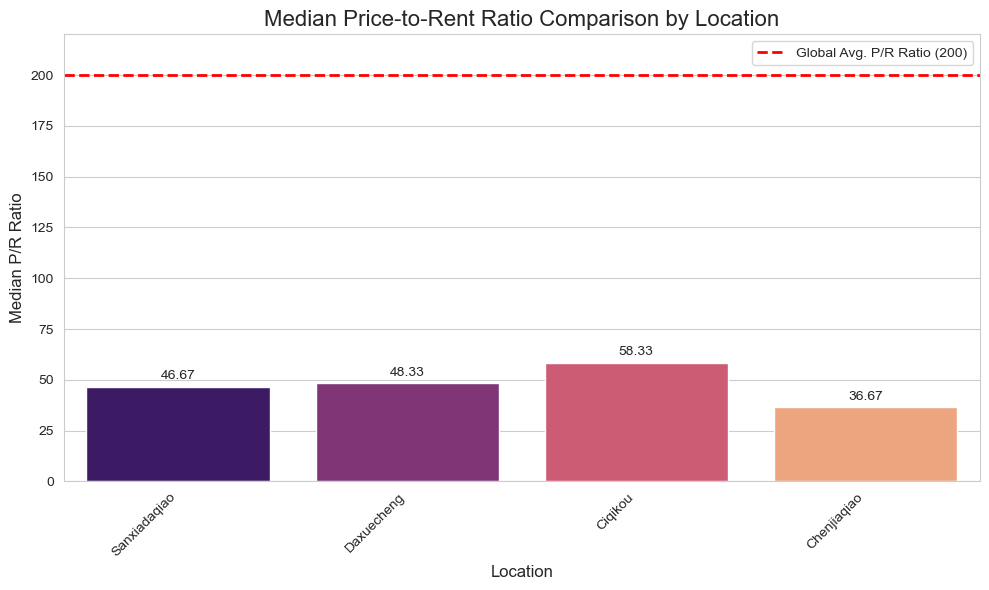

In [81]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))


location_mapping = {
    "三峡大桥": "Sanxiadaqiao",
    "陈家桥": "Chenjiaqiao",
    "磁器口": "Ciqikou",
    "大学城": "Daxuecheng",
}

ratio_df['location'] = ratio_df['location'].replace(location_mapping)


sns.barplot(
    x='location',
    y='Price_to_Rent_Ratio', 
    data=ratio_df, 
    palette='magma',
    hue='location', 
    legend=False     
)


# 添加环球线(Price to Rent Ratio = 200)


global_pr_ratio = 200


plt.axhline(
    y=global_pr_ratio, 
    color='red', 
    linestyle='--', 
    linewidth=2, 
    label=f'Global Avg. P/R Ratio ({global_pr_ratio})' # English label
)


plt.title('Median Price-to-Rent Ratio Comparison by Location', fontsize=16) # English Title
plt.xlabel('Location', fontsize=12) # English X-axis Label
plt.ylabel('Median P/R Ratio', fontsize=12) # English Y-axis Label

y_max = max(pr_ratio_df['Price_to_Rent_Ratio'].max() * 1.1, global_pr_ratio * 1.1)
plt.ylim(0, y_max) 

plt.legend()
plt.xticks(rotation=45, ha='right') 

# 添加数据标签
for index, row in ratio_df.iterrows():
    plt.text(
        index, 
        row['Price_to_Rent_Ratio'] + (y_max * 0.01), 
        f"{row['Price_to_Rent_Ratio']:.2f}", 
        ha='center', 
        va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

In [82]:
import statsmodels.formula.api as smf
import seaborn as sns

In [83]:
model1 = smf.ols('单价 ~ 面积 + location', data = df_house).fit()
model2 = smf.ols('单价 ~ 面积 + location', data = df_rent).fit()
display(model1.summary())
display(model2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     单价   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     263.7
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          4.19e-202
Time:                        17:15:31   Log-Likelihood:                -40115.
No. Observations:                4138   AIC:                         8.024e+04
Df Residuals:                    4133   BIC:                         8.027e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.026e+04    165.576     61.988      0.000    9939.126    1.06e+04
location[T.大学城] -3735.3147    164.809    -22.665      0.000   -4058.428   -3412.201
location[T.磁器口]  -417.5715    154.524     -2.702      0.007    -720.522    -114.621
location[T.陈家桥] -4985.4810    272.942    -18.266      0.000   -5520.594   -4450.368
面积                 29.3700      1.477     19.886      0.000      26.474      32.266
==============================================================================
Omnibus:                      958.519   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3069.406
Skew:                           1.165   Prob(JB):                         0.00
Kurtosis:                       6.518   Cond. No.                         508.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     单价   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     127.6
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          2.46e-100
Time:                        17:15:31   Log-Likelihood:                -10447.
No. Observations:                2847   AIC:                         2.090e+04
Df Residuals:                    2842   BIC:                         2.093e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          33.6494      0.426     78.949      0.000      32.814      34.485
location[T.大学城]    -6.4009      0.389    -16.459      0.000      -7.163      -5.638
location[T.磁器口]    -4.3057      0.550     -7.828      0.000      -5.384      -3.227
location[T.陈家桥]    -9.1814      1.401     -6.553      0.000     -11.929      -6.434
面积                 -0.0609      0.005    -13.211      0.000      -0.070      -0.052
==============================================================================
Omnibus:                     2361.117   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           136385.347
Skew:                           3.538   Prob(JB):                         0.00
Kurtosis:                      36.161   Cond. No.                         664.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
df_house['predicted_price_per_m2'] = model1.predict(df_house)
df_rent['predicted_rent_per_m2'] = model2.predict(df_rent)
df_rent['price_to_rent_ratio'] = (df_house['predicted_price_per_m2'] / (df_rent['predicted_rent_per_m2']*12)).clip(lower=0)
pr_ratio_df = df_rent.groupby('location')['price_to_rent_ratio'].median().reset_index()
pr_ratio_df.columns = ['location', 'Price_to_Rent_Ratio']
pr_ratio_df = pr_ratio_df[pr_ratio_df['Price_to_Rent_Ratio'] > 0]
pr_ratio_df = pr_ratio_df.sort_values(by='Price_to_Rent_Ratio', ascending=False)
pr_ratio_df

,location,Price_to_Rent_Ratio
1,大学城,46.350132
3,陈家桥,36.467797
2,磁器口,36.206030
0,三峡大桥,27.053784


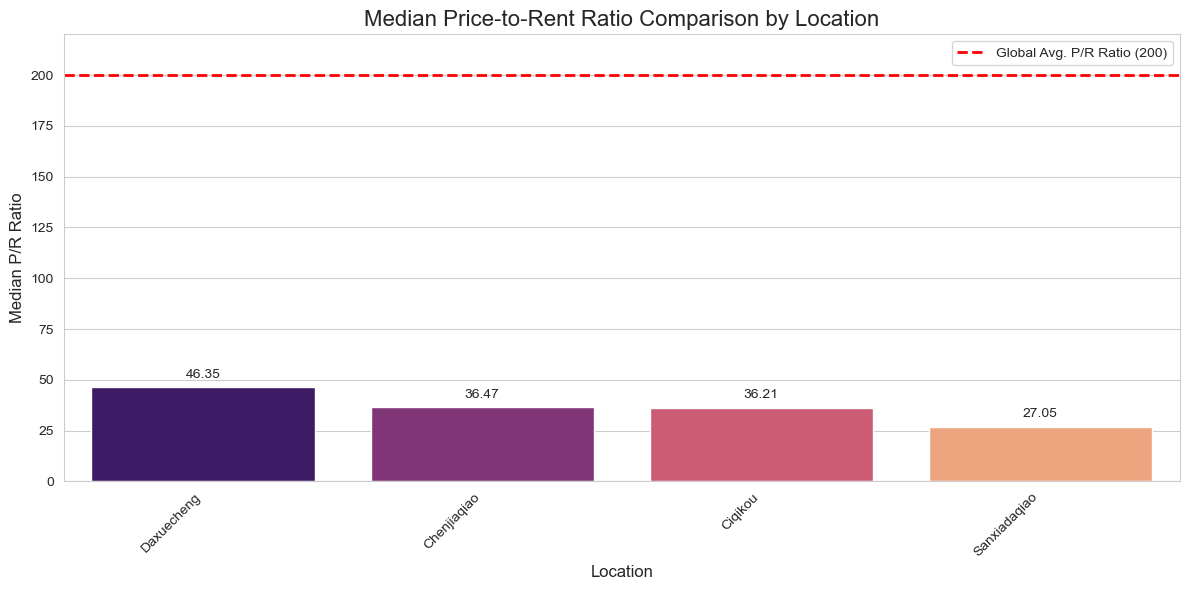

In [85]:
location_mapping = {
    "三峡大桥": "Sanxiadaqiao",
    "陈家桥": "Chenjiaqiao",
    "磁器口": "Ciqikou",
    "大学城": "Daxuecheng",
}

pr_ratio_df['location'] = pr_ratio_df['location'].replace(location_mapping)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))


ax=sns.barplot(
    x='location', 
    y='Price_to_Rent_Ratio', 
    data=pr_ratio_df, 
    palette='magma',
    hue='location', 
    legend=False   
)


# 添加环球线 (Price to Rent Ratio = 200)

global_pr_ratio = 200

plt.axhline(
    y=global_pr_ratio, 
    color='red', 
    linestyle='--', 
    linewidth=2, 
    label=f'Global Avg. P/R Ratio ({global_pr_ratio})'
)


plt.title('Median Price-to-Rent Ratio Comparison by Location', fontsize=16) 
plt.xlabel('Location', fontsize=12) 
plt.ylabel('Median P/R Ratio', fontsize=12) 

y_max = max(pr_ratio_df['Price_to_Rent_Ratio'].max() * 1.1, global_pr_ratio * 1.1)
plt.ylim(0, y_max) 

plt.legend()
plt.xticks(rotation=45, ha='right') # Rotate X-axis labels for better fit

max_bar_value = pr_ratio_df['Price_to_Rent_Ratio'].max() # 获取最大柱子高度

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),      # 要显示的文本，格式化为两位小数
                (p.get_x() + p.get_width() / 2., p.get_height()), # 文本的位置 (x, y)
                ha = 'center', va = 'center',      # 水平和垂直对齐方式
                xytext = (0, 9),                   # 文本的偏移量
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [86]:
model1_plus = smf.ols('单价 ~ 面积 + location + I(面积 ** 2) + 面积:location', data = df_house).fit()
model2_plus = smf.ols('单价 ~ 面积 + location + I(面积 ** 2) + 面积:location', data = df_rent).fit()

display(model1_plus.summary())
display(model2_plus.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     单价   R-squared:                       0.223
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     148.1
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          1.05e-219
Time:                        17:15:32   Log-Likelihood:                -40063.
No. Observations:                4138   AIC:                         8.014e+04
Df Residuals:                    4129   BIC:                         8.020e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9274.7665    306.242     30.286      0.000    8674.366    9875.167
location[T.大学城]    -6477.0491    442.326    -14.643      0.000   -7344.245   -5609.853
location[T.磁器口]    -1586.5658    376.696     -4.212      0.000   -2325.094    -848.038
location[T.陈家桥]    -8039.0144    778.953    -10.320      0.000   -9566.181   -6511.848
面积                    58.6604      4.734     12.391      0.000      49.379      67.942
面积:location[T.大学城]    27.1219      4.283      6.332      0.000      18.724      35.520
面积:location[T.磁器口]    12.5074      3.857      3.243      0.001       4.946      20.068
面积:location[T.陈家桥]    28.8910      6.994      4.131      0.000      15.179      42.603
I(面积 ** 2)            -0.1719      0.018     -9.544      0.000      -0.207      -0.137
==============================================================================
Omnibus:                      959.020   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3031.476
Skew:                           1.170   Prob(JB):                         0.00
Kurtosis:                       6.479   Cond. No.                     2.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     单价   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     89.93
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          2.27e-133
Time:                        17:15:32   Log-Likelihood:                -10360.
No. Observations:                2847   AIC:                         2.074e+04
Df Residuals:                    2838   BIC:                         2.079e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             38.3615      0.691     55.505      0.000      37.006      39.717
location[T.大学城]       -4.7373      0.830     -5.710      0.000      -6.364      -3.110
location[T.磁器口]       -0.5622      1.118     -0.503      0.615      -2.754       1.629
location[T.陈家桥]       -1.3420      3.779     -0.355      0.723      -8.753       6.069
面积                    -0.1787      0.012    -14.875      0.000      -0.202      -0.155
面积:location[T.大学城]    -0.0173      0.010     -1.745      0.081      -0.037       0.002
面积:location[T.磁器口]    -0.0464      0.013     -3.589      0.000      -0.072      -0.021
面积:location[T.陈家桥]    -0.0792      0.040     -1.997      0.046      -0.157      -0.001
I(面积 ** 2)             0.0006   4.29e-05     12.890      0.000       0.000       0.001
==============================================================================
Omnibus:                     2495.253   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           167842.028
Skew:                           3.817   Prob(JB):                         0.00
Kurtosis:                      39.832   Cond. No.                     2.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
print(f"model1的R^2为{model1.rsquared}, model1_plus的R^2为{model1_plus.rsquared}")
print(f"model2的R^2为{model2.rsquared}, model2_plus的R^2为{model2_plus.rsquared}")

model1的R^2为0.20332476587110138, model1_plus的R^2为0.2229725591643399
model2的R^2为0.15227011198274365, model2_plus的R^2为0.20224266373638244


可以看出plus对于两个模型的拟合优度都有变高 可能是因为平方项或者交互项的影响 比如随着面积越大 每平米额外费用更大，或者多类别虚拟变量location对于面积存在影响等等 因变量可以更好被自变量解释

In [88]:
df_house['predicted_pro_price_per_m2'] = model1_plus.predict(df_house)
df_rent['predicted_pro_rent_per_m2'] = model2_plus.predict(df_rent)
df_rent['price_to_rent_ratio_pro'] = (df_house['predicted_pro_price_per_m2'] / (df_rent['predicted_pro_rent_per_m2']*12)).clip(lower=0)
pr_ratio_pro_df = df_rent.groupby('location')['price_to_rent_ratio_pro'].median().reset_index()
pr_ratio_pro_df.columns = ['location', 'Price_to_Rent_Ratio']
pr_ratio_pro_df = pr_ratio_pro_df[pr_ratio_pro_df['Price_to_Rent_Ratio'] > 0]
pr_ratio_pro_df = pr_ratio_pro_df.sort_values(by='Price_to_Rent_Ratio', ascending=False)
pr_ratio_pro_df

,location,Price_to_Rent_Ratio
1,大学城,47.439132
3,陈家桥,37.294459
2,磁器口,35.670275
0,三峡大桥,27.795867


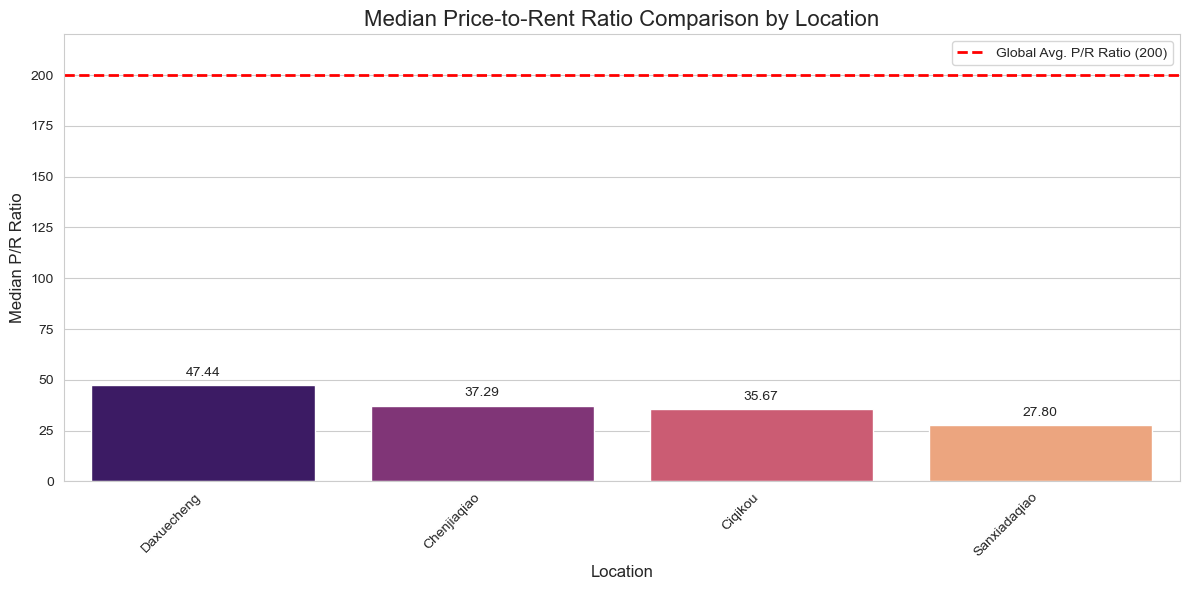

In [89]:
location_mapping = {
    "三峡大桥": "Sanxiadaqiao",
    "陈家桥": "Chenjiaqiao",
    "磁器口": "Ciqikou",
    "大学城": "Daxuecheng",
}

pr_ratio_pro_df['location'] = pr_ratio_pro_df['location'].replace(location_mapping)


sns.set_style("whitegrid")
plt.figure(figsize=(12, 6)) 


ax=sns.barplot(
    x='location', 
    y='Price_to_Rent_Ratio', 
    data=pr_ratio_pro_df, 
    palette='magma',
    hue='location', 
    legend=False  
)


global_pr_ratio = 200

plt.axhline(
    y=global_pr_ratio, 
    color='red', 
    linestyle='--', 
    linewidth=2, 
    label=f'Global Avg. P/R Ratio ({global_pr_ratio})'
)


plt.title('Median Price-to-Rent Ratio Comparison by Location', fontsize=16) 
plt.xlabel('Location', fontsize=12) 
plt.ylabel('Median P/R Ratio', fontsize=12) 

# Set Y-axis limit (保持不变)
y_max = max(pr_ratio_pro_df['Price_to_Rent_Ratio'].max() * 1.1, global_pr_ratio * 1.1)
plt.ylim(0, y_max) 

plt.legend()
plt.xticks(rotation=45, ha='right')

max_bar_value = pr_ratio_pro_df['Price_to_Rent_Ratio'].max() 
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),     
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center',     
                xytext = (0, 9),                  
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

In [90]:
print(f"使用原数据中位数计算的ratio为:\n{ratio_df}\n")
print(f"使用model计算的ratio为:\n{pr_ratio_df}\n")
print(f"使用model+计算的ratio为:\n{pr_ratio_pro_df}\n")

使用原数据中位数计算的ratio为:
       location  售价中位数(万)  租价中位数(元)  Price_to_Rent_Ratio
0  Sanxiadaqiao      84.0    1500.0            46.666667
1    Daxuecheng      87.0    1500.0            48.333333
2       Ciqikou     112.0    1600.0            58.333333
3   Chenjiaqiao      66.0    1500.0            36.666667

使用model计算的ratio为:
       location  Price_to_Rent_Ratio
1    Daxuecheng            46.350132
3   Chenjiaqiao            36.467797
2       Ciqikou            36.206030
0  Sanxiadaqiao            27.053784

使用model+计算的ratio为:
       location  Price_to_Rent_Ratio
1    Daxuecheng            47.439132
3   Chenjiaqiao            37.294459
2       Ciqikou            35.670275
0  Sanxiadaqiao            27.795867



可以看出对于两个模型的price to rent ratio比较接近 而距离真实数据相差较远

我认为最后一个模型的效果最好，加入平方项、交叉项，对于不同区域有不同的方程，同时考虑了非线性影响模拟显示情况，可能存在不能准确描述的问题，对于变量有进一步解释